In [1]:
import xarray as xr
import s3fs

In [2]:
%%time
fs = s3fs.S3FileSystem(anon=False)

s3path="s3://dev-et-data/logan/mini_square_maine.nc"
fobj = fs.open(s3path)
DS = xr.open_dataset(fobj, engine='h5netcdf')

CPU times: user 4.32 s, sys: 4.05 s, total: 8.36 s
Wall time: 21.8 s


In [3]:
! aws s3 ls dev-et-data/logan/

                           PRE in/
2021-01-25 19:16:36 1126859644 mini_square_maine.nc
2021-01-25 19:16:11 1126861208 mini_square_maine.pickle
2021-01-25 17:27:00 7320873892 square_maine.nc
2021-01-25 17:32:13 7320875460 square_maine.pickle
2021-01-19 17:22:11 2151785664 water.nc


In [4]:
DS

<xarray.Dataset>
Dimensions:  (datePR: 51, time: 51, x: 1930, y: 1908)
Coordinates:
  * x        (x) float64 2.745e+05 2.745e+05 2.746e+05 ... 3.323e+05 3.324e+05
  * y        (y) float64 5.06e+06 5.059e+06 5.059e+06 ... 5.002e+06 5.002e+06
  * datePR   (datePR) object '2018-10-23_012_029' ... '2016-05-10_012_029'
  * time     (time) object '2018-10-23' '2018-10-07' ... '2016-05-10'
Data variables:
    red      (datePR, y, x) int16 ...
    green    (datePR, y, x) int16 ...
    blue     (datePR, y, x) int16 ...
Attributes:
    crs:      32619

# the below animation blows up memory
## fixes include
- animate with separate png files
- explore using dask
- use COG overviews from single bands
- make smaller use mini_square_maine

Generating 51 frame animation
    Exporting animation to ./mini_square_maine.gif


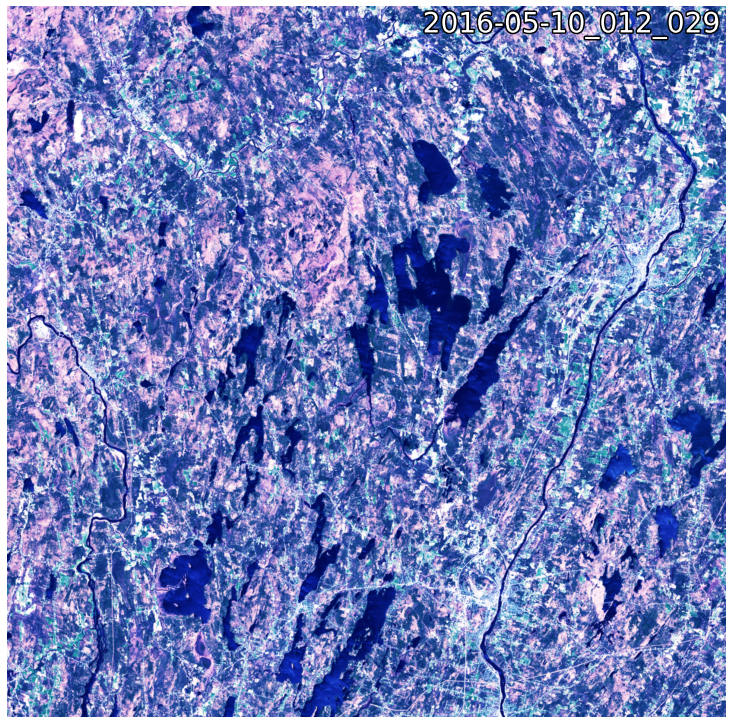

In [5]:
from notebookLib.nb_animate import nb_animated_timeseries

nb_animated_timeseries(DS,output_path='./mini_square_maine.gif',bands = ['red', 'green', 'blue'], time_dim='datePR',  
      percentile_stretch=(.2,.85), interval=1200)

In [6]:
DS

<xarray.Dataset>
Dimensions:  (datePR: 51, time: 51, x: 1930, y: 1908)
Coordinates:
  * x        (x) float64 2.745e+05 2.745e+05 2.746e+05 ... 3.323e+05 3.324e+05
  * y        (y) float64 5.06e+06 5.059e+06 5.059e+06 ... 5.002e+06 5.002e+06
  * datePR   (datePR) object '2018-10-23_012_029' ... '2016-05-10_012_029'
  * time     (time) object '2018-10-23' '2018-10-07' ... '2016-05-10'
Data variables:
    red      (datePR, y, x) int16 11709 13565 14568 14939 ... 7387 7020 7705
    green    (datePR, y, x) int16 11305 12938 14002 14369 ... 7952 7783 8093
    blue     (datePR, y, x) int16 13543 14751 15028 15489 ... 8605 8576 8776
Attributes:
    crs:      32619